In [30]:
import pandas as pd

In [31]:
df = pd.read_csv('bestsellers with categories.csv')
print(df.head())
print(df.shape)

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
(550, 7)


Про скільки книг зберігає дані датасет? Відповідь: 549

In [32]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [33]:
print(df.isna().sum())

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


Чи є в якихось змінних пропуски? Відповідь: Ні

In [34]:
print(df['genre'].unique())

['Non Fiction' 'Fiction']


Які є унікальні жанри? Відповідь: Non Fiction, Fiction

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


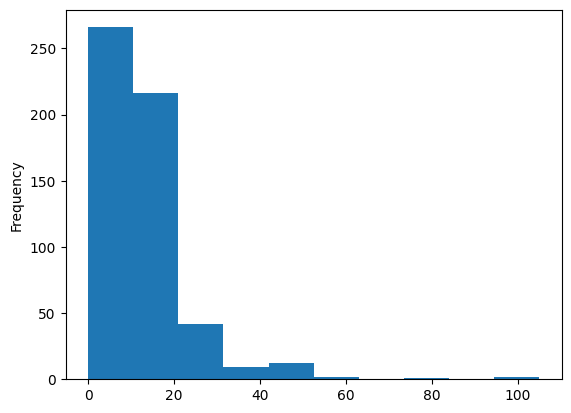

In [35]:
df['price'].plot(kind='hist')
print("Максимальна ціна:", df['price'].max())
print("Мінімальна ціна:", df['price'].min())
print("Середня ціна:", df['price'].mean())
print("Медіанна ціна:", df['price'].median())

In [36]:
print("Який рейтинг у датасеті найвищий? Відповідь:", df['user_rating'].max())
print("Скільки книг мають такий рейтинг? Відповідь:", df[df['user_rating'] == df['user_rating'].max()].shape[0])

Який рейтинг у датасеті найвищий? Відповідь: 4.9
Скільки книг мають такий рейтинг? Відповідь: 52


In [37]:
max_reviews_book = df.loc[df['reviews'].idxmax()]['name']
print("Яка книга має найбільше відгуків? Відповідь:", max_reviews_book)

Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing


In [38]:
max_price_2015 = df[(df['year'] == 2015)]['price'].max()
print("З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:", df[(df['year'] == 2015) & (df['price'] == max_price_2015)]['name'].values[0])

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: Publication Manual of the American Psychological Association, 6th Edition


In [39]:
fiction_2010_count = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].shape[0]
print("Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:", fiction_2010_count)

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20


In [40]:
rating_4_9_count = df[(df['user_rating'] == '4.9') & ((df['year'] == 2010) | (df['year'] == 2011))].shape[0]
print("Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:", rating_4_9_count)

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 0


In [41]:
sorted_books_2015 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
last_book_name = sorted_books_2015.iloc[-1]['name']
print("Яка книга остання у відсортованому списку? Відповідь:", last_book_name)

Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)


In [42]:
genre_prices = df.groupby('genre')['price'].agg(['max', 'min'])
print("Максимальна ціна для жанру Fiction? Відповідь:", genre_prices.loc['Fiction', 'max'])
print("Мінімальна ціна для жанру Fiction? Відповідь:", genre_prices.loc['Fiction', 'min'])
print("Максимальна ціна для жанру Non Fiction? Відповідь:", genre_prices.loc['Non Fiction', 'max'])
print("Мінімальна ціна для жанру Non Fiction? Відповідь:", genre_prices.loc['Non Fiction', 'min'])

Максимальна ціна для жанру Fiction? Відповідь: 82
Мінімальна ціна для жанру Fiction? Відповідь: 0
Максимальна ціна для жанру Non Fiction? Відповідь: 105
Мінімальна ціна для жанру Non Fiction? Відповідь: 0


In [43]:
author_books_count = df.groupby('author')['name'].count().reset_index()
author_books_count.columns = ['author', 'books_count']
print("Якої розмірності вийшла таблиця? Відповідь:", author_books_count.shape)
max_books_author = author_books_count.loc[author_books_count['books_count'].idxmax(), 'author']
print("Який автор має найбільше книг? Відповідь:", max_books_author)
print("Скільки книг цього автора? Відповідь:", author_books_count.loc[author_books_count['author'] == max_books_author, 'books_count'].values[0])

Якої розмірності вийшла таблиця? Відповідь: (248, 2)
Який автор має найбільше книг? Відповідь: Jeff Kinney
Скільки книг цього автора? Відповідь: 12


In [44]:
author_avg_rating = df.groupby('author')['user_rating'].mean().reset_index()
author_avg_rating.columns = ['author', 'avg_rating']
print("У якого автора середній рейтинг мінімальний? Відповідь:", author_avg_rating.loc[author_avg_rating['avg_rating'].idxmin(), 'author'])
print("Який у цього автора середній рейтинг? Відповідь:", author_avg_rating.loc[author_avg_rating['avg_rating'].idxmin(), 'avg_rating'])

У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
Який у цього автора середній рейтинг? Відповідь: 3.9


In [45]:
author_info = pd.concat([author_books_count, author_avg_rating], axis=1)

In [46]:
sorted_author_info = author_info.sort_values(by=['books_count', 'avg_rating'])
print("Який автор перший у списку? Відповідь:", sorted_author_info.iloc[0]['author'])

Який автор перший у списку? Відповідь: author    Muriel Barbery
author    Muriel Barbery
Name: 171, dtype: object


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-48-450494d9f142>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genre', data=df, palette='viridis')


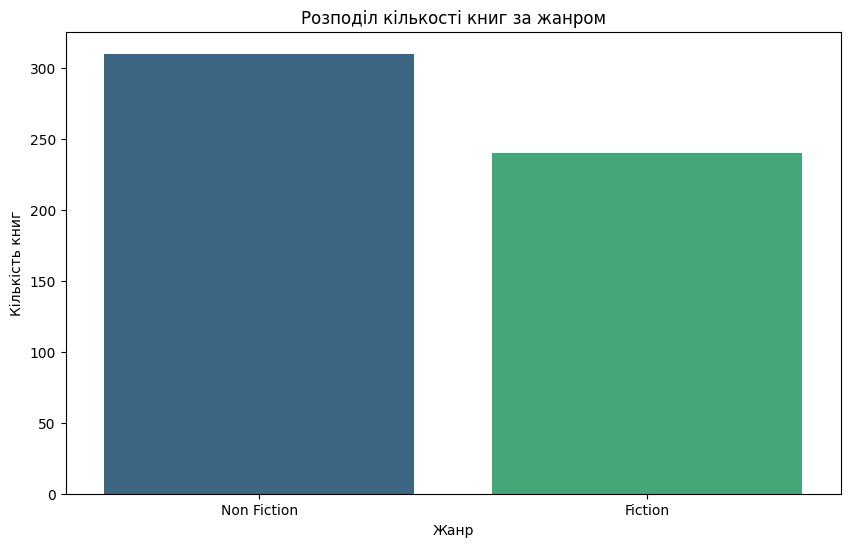

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='genre', data=df, palette='viridis')
plt.title('Розподіл кількості книг за жанром')
plt.xlabel('Жанр')
plt.ylabel('Кількість книг')
plt.show()

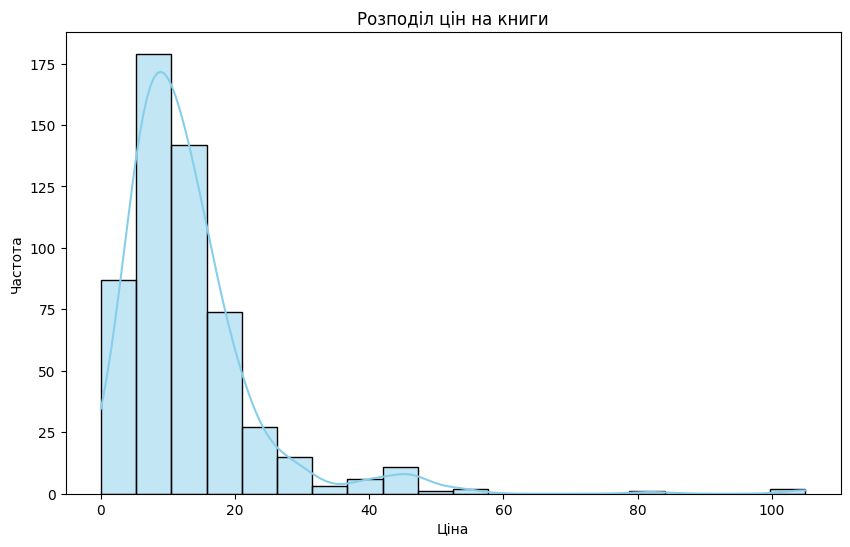

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True, color='skyblue')
plt.title('Розподіл цін на книги')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.show()

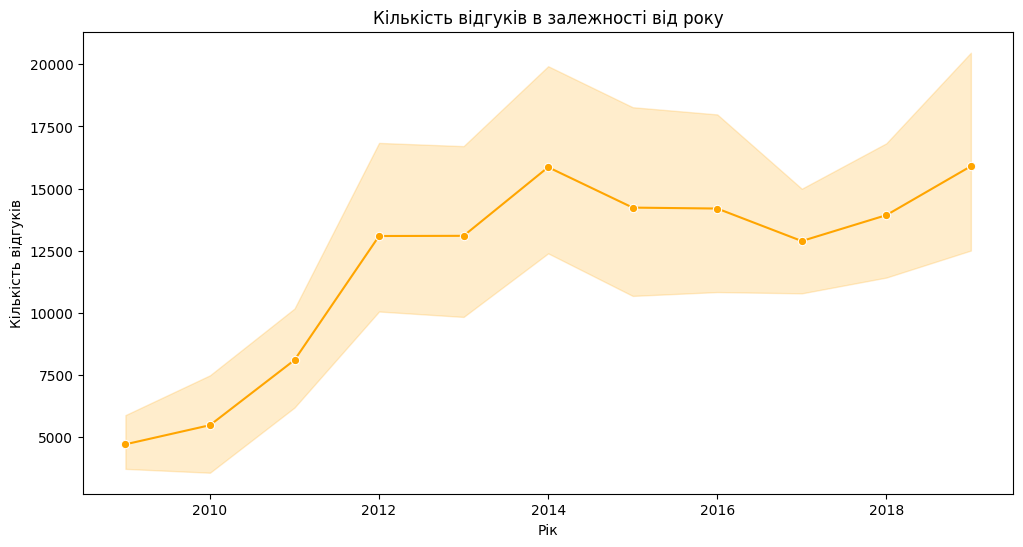

In [50]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='reviews', data=df, marker='o', color='orange')
plt.title('Кількість відгуків в залежності від року')
plt.xlabel('Рік')
plt.ylabel('Кількість відгуків')
plt.show()

<ipython-input-51-aa893e582b3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='user_rating', data=df, palette='muted')


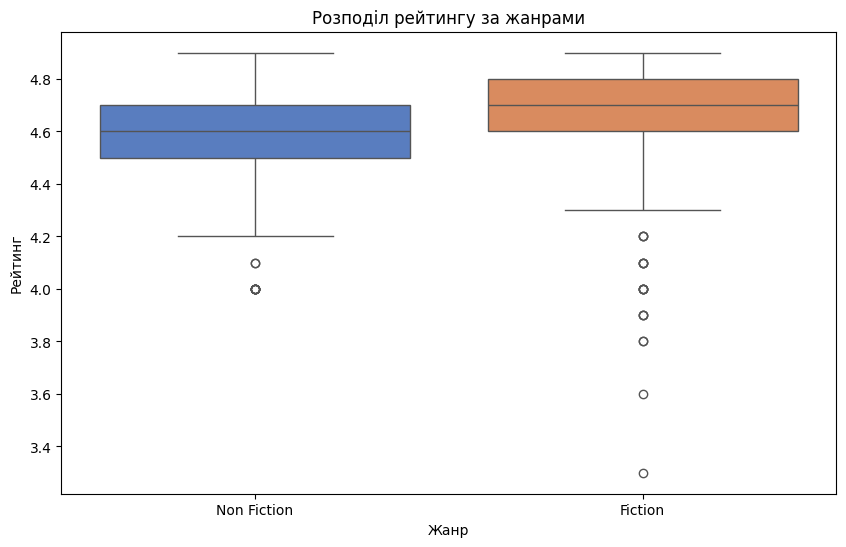

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='user_rating', data=df, palette='muted')
plt.title('Розподіл рейтингу за жанрами')
plt.xlabel('Жанр')
plt.ylabel('Рейтинг')
plt.show()

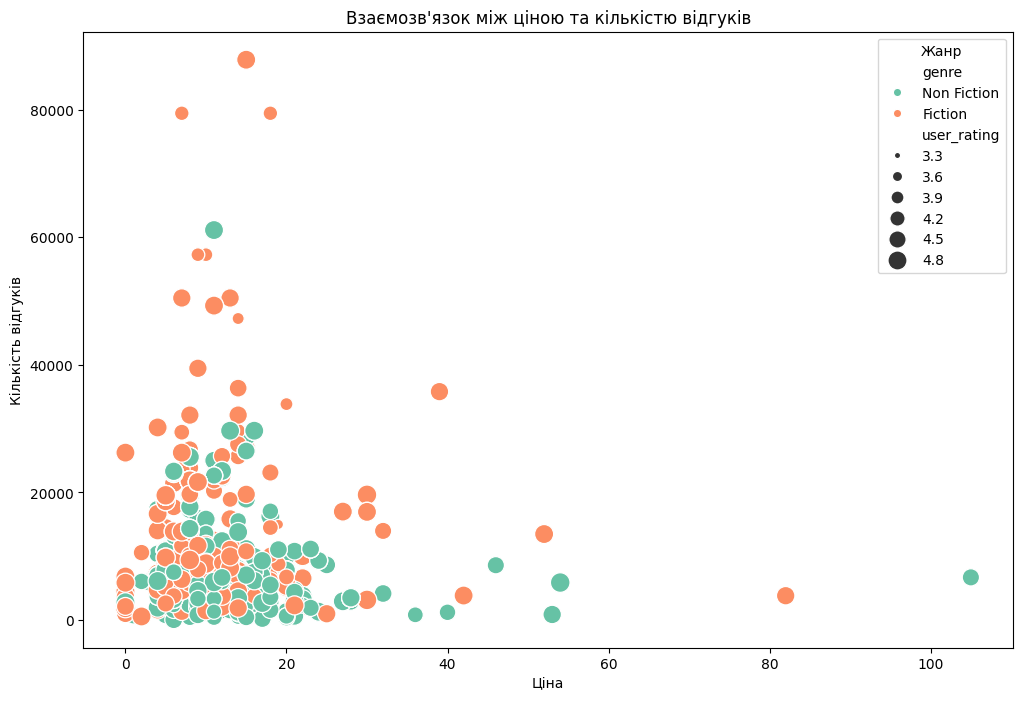

In [52]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='price', y='reviews', data=df, hue='genre', palette='Set2', size='user_rating', sizes=(20, 200))
plt.title('Взаємозв\'язок між ціною та кількістю відгуків')
plt.xlabel('Ціна')
plt.ylabel('Кількість відгуків')
plt.legend(title='Жанр')
plt.show()